In [10]:
import pandas as pd
import csv
import re
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:/Users/Ardi/scrapy/bmkg_di/spiders/earthquake_data.csv")
print(df.head())

  Waktu Gempa    Lintang - Bujur  Magnitudo Kedalaman  \
0  07/03/2023   6.47 LS 103.9 BT        5.3     10 Km   
1  07/03/2023  0.11 LS 120.32 BT        4.6      5 Km   
2  06/03/2023  2.46 LS 140.72 BT        2.7     10 Km   
3  06/03/2023  0.15 LS 123.14 BT        4.5    132 Km   
4  05/03/2023   2.7 LS 140.01 BT        4.4     50 Km   

                               Dirasakan (Skala MMI)  
0  Pusat gempa berada dilaut 140 Km BaratDaya Tan...  
1  Pusat gempa berada di laut 30 km Tenggara Pari...  
2  Pusat gempa berada di laut 8 km timur laut Kot...  
3  Pusat gempa berada di laut 76 km Tenggara Bone...  
4  Pusat gempa berada di darat 46 km BaratDaya Ka...  


In [6]:
print(df['Lintang - Bujur'])

0      6.47 LS 103.9 BT
1     0.11 LS 120.32 BT
2     2.46 LS 140.72 BT
3     0.15 LS 123.14 BT
4      2.7 LS 140.01 BT
5     2.53 LS 140.67 BT
6     2.67 LS 121.98 BT
7     2.49 LS 140.73 BT
8     0.42 LS 123.01 BT
9     7.69 LS 106.52 BT
10     3.8 LS 101.83 BT
11    2.48 LS 140.71 BT
12     1.27 LU 120.2 BT
13    2.42 LU 128.39 BT
14    1.65 LS 100.71 BT
15    2.91 LS 119.37 BT
16    2.94 LS 119.36 BT
17    2.47 LS 140.67 BT
18    1.37 LU 125.83 BT
19    7.03 LS 106.64 BT
Name: Lintang - Bujur, dtype: object


In [9]:
pattern = r'^\s*([\d\.]+)\s+(LS|LU)\s+([\d\.]+)\s+BT\s*$'
df[['Latitude', 'LS_LU', 'Longitude']] = df['Lintang - Bujur'].str.extract(pattern)

# convert latitude values in LS format to negative
df.loc[df['LS_LU'] == 'LS', 'Latitude'] = '-' + df.loc[df['LS_LU'] == 'LS', 'Latitude']

# drop the intermediate column 'LS_LU'
df.drop(columns=['LS_LU'], inplace=True)

# change to numeric
df['Latitude'] = pd.to_numeric(df['Latitude'])
df['Longitude'] = pd.to_numeric(df['Longitude'])

print(df)

   Waktu Gempa    Lintang - Bujur  Magnitudo Kedalaman  \
0   07/03/2023   6.47 LS 103.9 BT        5.3     10 Km   
1   07/03/2023  0.11 LS 120.32 BT        4.6      5 Km   
2   06/03/2023  2.46 LS 140.72 BT        2.7     10 Km   
3   06/03/2023  0.15 LS 123.14 BT        4.5    132 Km   
4   05/03/2023   2.7 LS 140.01 BT        4.4     50 Km   
5   05/03/2023  2.53 LS 140.67 BT        3.0     10 Km   
6   05/03/2023  2.67 LS 121.98 BT        4.8      5 Km   
7   04/03/2023  2.49 LS 140.73 BT        2.7      7 Km   
8   03/03/2023  0.42 LS 123.01 BT        4.9     52 Km   
9   03/03/2023  7.69 LS 106.52 BT        3.8     27 Km   
10  03/03/2023   3.8 LS 101.83 BT        5.1     12 Km   
11  03/03/2023  2.48 LS 140.71 BT        2.6     10 Km   
12  02/03/2023   1.27 LU 120.2 BT        4.8      8 Km   
13  02/03/2023  2.42 LU 128.39 BT        4.8     50 Km   
14  02/03/2023  1.65 LS 100.71 BT        5.6     82 Km   
15  01/03/2023  2.91 LS 119.37 BT        1.6      3 Km   
16  01/03/2023

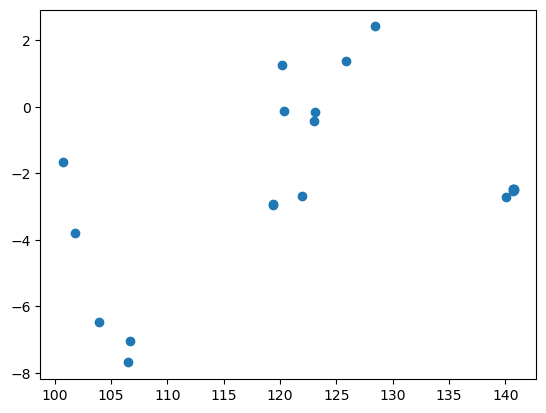

In [11]:
plt.scatter(x=df.Longitude, y=df.Latitude)